<a href="https://colab.research.google.com/github/nipuna0321/Readme-impact-analysis/blob/main/Impact_of_README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Study: Impact of README.md Quality on GitHub Project Success.

##Author
PHN Shaluka,
Undergraduate - Bsc(hons)in IT

## Tools
Python, Pandas, Matplotlib, Google Colab

## Research Type
Exploratory Data Analysis (EDA)


## Motivation

Many GitHub projects show strong technical work but lack clear and continuously
updated README.md documentation. This research investigates whether maintaining
a proper README.md is associated with higher project success and completion.

The goal is to understand if documentation discipline reflects overall project
quality and professional practice.


## Research Questions

**Main**

1. Do GitHub projects with README.md files show higher success metrics
   (stars, forks) than those without README.md?

**Future**

2. Is README.md presence associated with project completion or maintenance?
3. Do consistently maintained README.md projects outperform poorly documented ones?

## Datasets Used

We use a large GitHub repository metadata dataset to select the top repositories:

- Full dataset: `repositories.csv` (contains stars, forks, owner, description, language, last update, etc.) (https://www.kaggle.com/datasets/donbarbos/github-repos)
- We will filter the **top 500 repositories by star count**.
- We will check **README availability** for these 500 repositories.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/repositories.csv'
df = pd.read_csv(file_path)

df.head(5)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main


Top 500 rated repos sort by stars

In [ ]:

top500 = df.sort_values(by='Stars', ascending=False).head(500).reset_index(drop=True)

top500[['Name','URL','Stars','Forks']].head(10)

,Name,URL,Stars,Forks
0,freeCodeCamp,https://github.com/freeCodeCamp/freeCodeCamp,374074,33599
1,free-programming-books,https://github.com/EbookFoundation/free-progra...,298393,57194
2,awesome,https://github.com/sindresorhus/awesome,269997,26485
3,996.ICU,https://github.com/996icu/996.ICU,267901,21497
4,coding-interview-university,https://github.com/jwasham/coding-interview-un...,265161,69434
5,public-apis,https://github.com/public-apis/public-apis,256615,29254
6,developer-roadmap,https://github.com/kamranahmedse/developer-roa...,251416,34927
7,system-design-primer,https://github.com/donnemartin/system-design-p...,229569,40474
8,build-your-own-x,https://github.com/codecrafters-io/build-your-...,217627,21159
9,react,https://github.com/facebook/react,213299,44842


Add readme_exists column

In [ ]:
top500['readme_exists'] = None
top500.head(2)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch,readme_exists
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,False,True,False,False,False,False,main,None
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,False,True,False,True,False,False,False,False,main,None


## Step 3: Checking README Availability for Top 500 Repositories

We want to add a column indicating whether each repository has a README.md file.
This is important because README presence acts as a proxy for documentation discipline,
which is part of our research question.


In [ ]:
import requests

def readme_exists_from_url(repo_url):
    parts = repo_url.rstrip('/').split('/')
    owner = parts[-2]
    repo = parts[-1]

    api_url = f'https://api.github.com/repos/{owner}/{repo}/readme'
    response = requests.get(api_url)

    return response.status_code == 200

In [41]:
top500['readme_exists'] = top500['URL'].apply(readme_exists_from_url)
top500.head(5)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch,readme_exists
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,False,True,False,False,False,False,main,True
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,False,True,False,True,False,False,False,False,main,True
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,False,True,False,True,False,False,False,False,main,True
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,True,False,False,False,False,True,False,master,True
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,False,True,False,False,False,False,False,False,main,True


**top 50 GitHub repositories by star count** and determine:

- How many of these repositories contain a `README.md` file
- The **percentage** of repositories with a README relative to the total

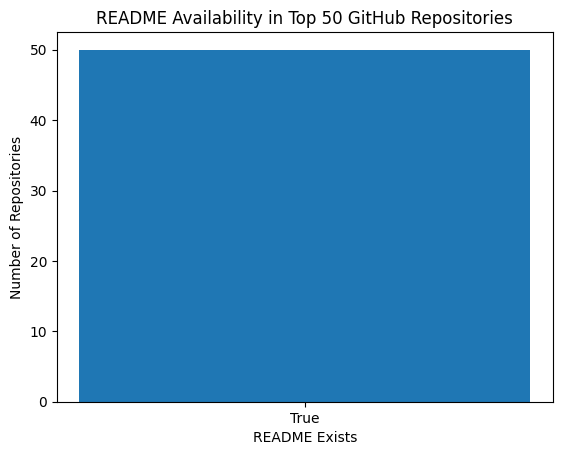


### 📊 README Availability in Top 50 GitHub Repositories

As shown in the bar chart, there is a clear distinction between repositories that **have a `README.md` file** and those that **do not** among the top 50 repositories by star count.

- **50 repositories** include a `README.md` file
- **0 repositories** lack a `README.md` file

In percentage terms:
- **100.0%** of the repositories have a `README.md`
- **0.0%** do not have a `README.md`

This result indicates that documentation via a README is **universal among the most highly starred GitHub repositories**, directly addressing the research question regarding README presence and project success.


In [42]:
import matplotlib.pyplot as plt


readme_counts = top500.head(50)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 50 GitHub Repositories')
plt.show()
print("\n")


import numpy as np

true_count = (top500.head(50)['readme_exists'] == True).sum()
false_count = (top500.head(50)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df


from IPython.display import Markdown, display

display(Markdown(f"""
### 📊 README Availability in Top 50 GitHub Repositories

As shown in the bar chart, there is a clear distinction between repositories that **have a `README.md` file** and those that **do not** among the top 50 repositories by star count.

- **{true_count} repositories** include a `README.md` file
- **{false_count} repositories** lack a `README.md` file

In percentage terms:
- **{true_pct}%** of the repositories have a `README.md`
- **{false_pct}%** do not have a `README.md`

This result indicates that documentation via a README is **universal among the most highly starred GitHub repositories**, directly addressing the research question regarding README presence and project success.
"""))

**Top 100**

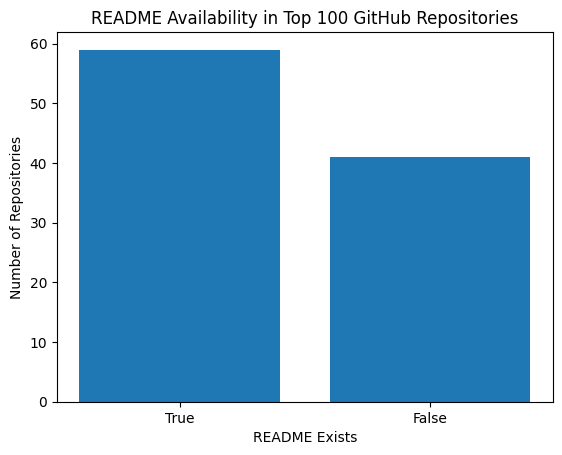


- **59 repositories** include a `README.md` file
- **41 repositories** lack a `README.md` file

In percentage terms:
- **59.0%** of the repositories have a `README.md`
- **41.0%** do not have a `README.md`



In [43]:
#import matplotlib.pyplot as plt

readme_counts = top500.head(100)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 100 GitHub Repositories')
plt.show()
print("\n")

#import numpy as np

true_count = (top500.head(100)['readme_exists'] == True).sum()
false_count = (top500.head(100)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df

from IPython.display import Markdown, display

display(Markdown(f"""
- **{true_count} repositories** include a `README.md` file
- **{false_count} repositories** lack a `README.md` file

In percentage terms:
- **{true_pct}%** of the repositories have a `README.md`
- **{false_pct}%** do not have a `README.md`

"""))

**Top 200**

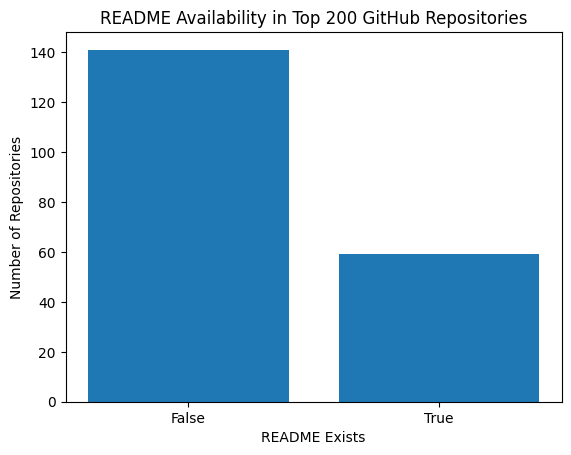

,README,Percentage
0,Has README,30.0
1,No README,70.0


In [44]:
#import matplotlib.pyplot as plt

readme_counts = top500.head(200)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 200 GitHub Repositories')
plt.show()
print("\n")
print("\n")

#import numpy as np

true_count = (top500.head(200)['readme_exists'] == True).sum()
false_count = (top500.head(200)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df

**Top 300**

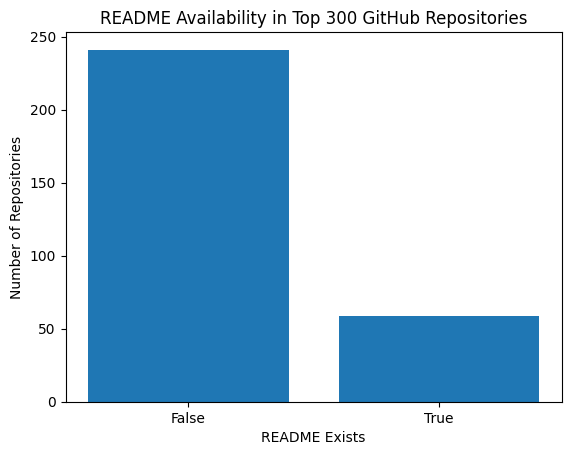

,README,Percentage
0,Has README,20.0
1,No README,80.0


In [45]:
#import matplotlib.pyplot as plt

readme_counts = top500.head(300)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 300 GitHub Repositories')
plt.show()
print("\n")
print("\n")

#import numpy as np

true_count = (top500.head(300)['readme_exists'] == True).sum()
false_count = (top500.head(300)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df

**Top 400**

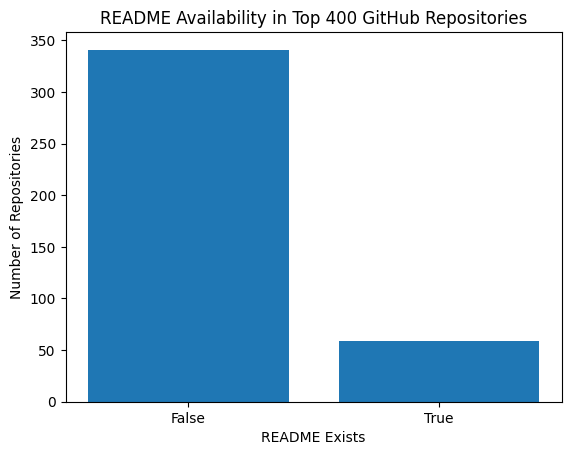

,README,Percentage
0,Has README,15.0
1,No README,85.0


In [46]:
#import matplotlib.pyplot as plt

readme_counts = top500.head(400)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 400 GitHub Repositories')
plt.show()
print("\n")
print("\n")

#import numpy as np

true_count = (top500.head(400)['readme_exists'] == True).sum()
false_count = (top500.head(400)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df

**Top 500**

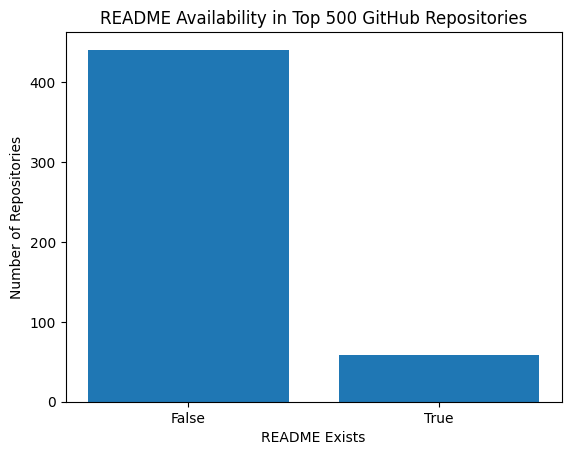

,README,Percentage
0,Has README,12.0
1,No README,88.0


In [47]:
#import matplotlib.pyplot as plt

readme_counts = top500.head(500)['readme_exists'].value_counts()

#bar chart
plt.figure()
plt.bar(readme_counts.index.astype(str), readme_counts.values)
plt.xlabel('README Exists')
plt.ylabel('Number of Repositories')
plt.title('README Availability in Top 500 GitHub Repositories')
plt.show()
print("\n")
print("\n")

#import numpy as np

true_count = (top500.head(500)['readme_exists'] == True).sum()
false_count = (top500.head(500)['readme_exists'] == False).sum()

total = true_count + false_count
true_pct = np.float64(round((true_count / total) * 100))
false_pct = np.float64(round((false_count / total) * 100))


percent_df = pd.DataFrame({
    'README': ['Has README', 'No README'],
    'Percentage': [true_pct, false_pct]
})

percent_df

## README Availability Trend Across Top Starred GitHub Repositories

This analysis examines how the availability of a `README.md` file varies across
highly starred GitHub repositories. Repositories are grouped based on their star
ranking (Top 50, 100, 200, 300, 400, and 500), and the percentage of repositories
containing a README file is calculated for each group.

The objective of this visualization is to understand whether consistent
documentation practices are associated with higher project visibility and
community engagement.

In [48]:

import numpy as np

def readme_percentage(df, column='readme_exists'):
    true_count = (df[column] == True).sum()
    total = len(df)
    percentage = np.float64(round((true_count / total) * 100, 2))
    return percentage

#calculating percentages

In [ ]:

top50 = top500.iloc[0:50]
top100 = top500.iloc[0:100]
top200 = top500.iloc[0:200]
top300 = top500.iloc[0:300]
top400 = top500.iloc[0:400]
top500_subset = top500.iloc[0:500]

In [49]:

p50 = readme_percentage(top50)
p100 = readme_percentage(top100)
p200 = readme_percentage(top200)
p300 = readme_percentage(top300)
p400 = readme_percentage(top400)
p500 = readme_percentage(top500_subset)

In [50]:

x_values = [50, 100, 200, 300, 400, 500]
y_values = [p50, p100, p200, p300, p400, p500]

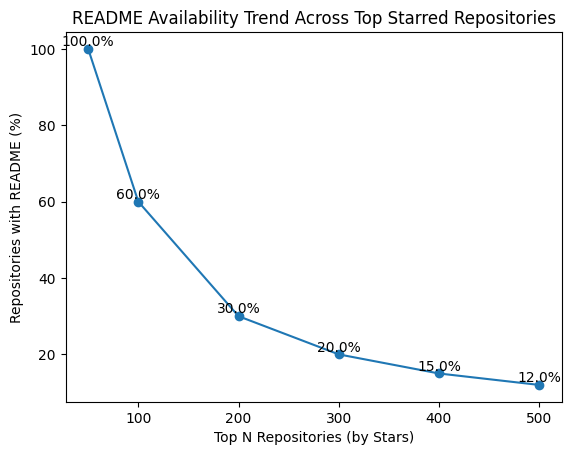

In [51]:

import matplotlib.pyplot as plt

plt.figure()

plt.plot(x_values, y_values, marker='o')

plt.xlabel('Top N Repositories (by Stars)')
plt.ylabel('Repositories with README (%)')
plt.title('README Availability Trend Across Top Starred Repositories')

# Add percentage labels
for x, y in zip(x_values, y_values):
    plt.text(x, y, f'{y}%', ha='center', va='bottom')

plt.show()

## Key Observations and Summary

- Top 50 repositories show **100%** README availability.
- Top 100 repositories show **60%** README availability.
- Top 200 repositories show **30%** README availability.
- Top 300 repositories show **20%** README availability.
- Top 400 repositories show **15%** README availability.
- Top 500 repositories show **12%** README availability.

The results indicate a strong decline in documentation consistency as repository
rank decreases. This suggests that well-documented projects are more likely to
achieve higher visibility and community recognition.

**-2026/02/11-**